In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [10]:
X = df_train[df_train.columns[1:]].to_numpy()
y = df_train[df_train.columns[0]]

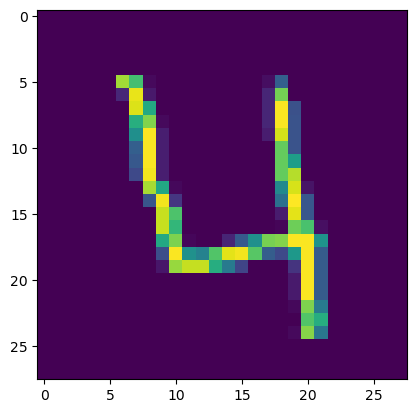

In [14]:
# Print Image here
import matplotlib.pyplot as plt
# No plotting an array, Plot Matrix
plt.imshow(X[3].reshape(28,28))

## Model Training

In [16]:
from sklearn.model_selection import train_test_split

X = X/255
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
import xgboost as xgb
# XGboost training

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [23]:
params = {
    'max_depth' : 7,
    'eta': 0.1, #Learning Rate
    'objective': "multi:softmax",
    'num_class' : 10
}

model = xgb.train(params = params, dtrain=dtrain, num_boost_round=3)

In [24]:
y_train_pred = model.predict(dtrain)
y_val_pred = model.predict(dval)

print("Training Acc:" , accuracy_score(y_train,y_train_pred))
print("Testing Acc:" , accuracy_score(y_val,y_val_pred))

Training Acc: 0.9355059523809524
Testing Acc: 0.9042857142857142


In [25]:
from sklearn.model_selection import ParameterGrid

params_dict ={
    'max_depth' : [2,7],
    'eta' : [0.1, 0.3],
    'objective': ["multi:softmax"],
    'num_class' : [10],
    'gamma' : [0.1,0.3]
}

In [33]:
result = []
for param in ParameterGrid(params_dict):
    print(param)
    model = xgb.train(params = param, dtrain=dtrain, num_boost_round=10)
    y_train_pred = model.predict(dtrain)
    y_val_pred = model.predict(dval)
    train_acc = accuracy_score(y_train,y_train_pred)
    test_acc = accuracy_score(y_val,y_val_pred)
    print("Training Acc:" , train_acc)
    print("Testing Acc:" , test_acc)
    result.append([param, train_acc, test_acc])
# Try different Param
# Return best paramater reuslt
# Tell me best result validation accuracy

{'eta': 0.1, 'gamma': 0.1, 'max_depth': 2, 'num_class': 10, 'objective': 'multi:softmax'}
Training Acc: 0.7849404761904762
Testing Acc: 0.7803571428571429
{'eta': 0.1, 'gamma': 0.1, 'max_depth': 7, 'num_class': 10, 'objective': 'multi:softmax'}
Training Acc: 0.9608333333333333
Testing Acc: 0.9272619047619047
{'eta': 0.1, 'gamma': 0.3, 'max_depth': 2, 'num_class': 10, 'objective': 'multi:softmax'}
Training Acc: 0.7849404761904762
Testing Acc: 0.7803571428571429
{'eta': 0.1, 'gamma': 0.3, 'max_depth': 7, 'num_class': 10, 'objective': 'multi:softmax'}
Training Acc: 0.9608035714285714
Testing Acc: 0.9272619047619047
{'eta': 0.3, 'gamma': 0.1, 'max_depth': 2, 'num_class': 10, 'objective': 'multi:softmax'}
Training Acc: 0.8288392857142857
Testing Acc: 0.819047619047619
{'eta': 0.3, 'gamma': 0.1, 'max_depth': 7, 'num_class': 10, 'objective': 'multi:softmax'}
Training Acc: 0.9832738095238095
Testing Acc: 0.944047619047619
{'eta': 0.3, 'gamma': 0.3, 'max_depth': 2, 'num_class': 10, 'objective':

In [34]:
best_result = result[0][2]
index = 0
for i in range(len(result)):
    if result[i][2] > best_result:
        best_result = result[i][2]
        index = i
print("best parameters are: ", result[index][0])
print("Training Acc: ", result[index][1])
print("Testing Acc: ", result[index][2])

best parameters are:  {'eta': 0.3, 'gamma': 0.3, 'max_depth': 7, 'num_class': 10, 'objective': 'multi:softmax'}
Training Acc:  0.9838392857142857
Testing Acc:  0.9441666666666667
